CONTEXT:

DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. The NGO is working on improving the policies with respect to the income of the needful people so that workers can be paid according to the work and also introduce some programs to enhance the skills of the work which will eventually help in the overall development of the nation. The NGO has received the dataset by the government and needs to be analyzed thoroughly. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal with the government.

OBJECTIVE:

-Understand the different factors that influence the income of an individual.

-To build a prediction model that can help the government formulate policies for the right pockets of the society.

DATA DICTIONARY:


    age: continuous - age of a Person
    workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
    education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: no. of years a person studied - continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship : Relationship of the person with the dependent member. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: Investment gain of the person other than salary - continuous
    capital-loss: Loss from investments - continuous
    hours-per-week: No. of hours a person works - continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
    salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)
  

In [50]:
print("*"*100)

****************************************************************************************************


In [51]:
#Importing relevant libraries.

#Dataframe and numeric operations.
import numpy as np
import pandas as pd

#Visualiation.
import matplotlib.pyplot as plt
import seaborn as sns

#Decision tree.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Easier access.

#Model tuning and optimization.
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Model scoring.
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

#Warnings.
import warnings
warnings.filterwarnings("ignore")

#Constant Variables.
r_state = 1

#Pipeline creation.
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Model exporting/importing.
import pickle

In [52]:
print("*"*100)

****************************************************************************************************


In [53]:
#Connecting to google colab.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#Loading data and creating a backup copy of the original dataframe as a reference point.
df_original = pd.read_csv("/content/drive/MyDrive/Datasets/who_data.csv")
df = df_original.copy()

In [55]:
print("*"*100)

****************************************************************************************************


EXTENSIVE ANALYSIS WILL NOT BE DONE AS THIS IS THE SAME DATA-SET THAT WAS USING THE THE LOGISTIC REGRESSION DEMONSTRATION. SEE THAT PROJECT TO VIEW IN-DEPTH DATA ANALYSIS AND PREPROCESSING.

In [56]:
df.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education                 object
education_no_of_years      int64
marital_status            object
occupation                object
relationship              object
race                      object
sex                       object
capital_gain               int64
capital_loss               int64
working_hours_per_week     int64
native_country            object
salary                    object
dtype: object

In [57]:
#Switching object dtypes to categorical.
#Separating variables into numeric and categorical.
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].astype('category')

In [58]:
df[cat_cols].dtypes

workclass         category
education         category
marital_status    category
occupation        category
relationship      category
race              category
sex               category
native_country    category
salary            category
dtype: object

In [59]:
#Checking for duplicated entries.
df.duplicated().sum()

24

In [60]:
#Dropping duplicated entries.
df = df.drop_duplicates()
df.duplicated().sum()

0

In [61]:
#Checking for missing values.
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

There are no missing values and and anyways missing values would not be a problem for decison trees as they can handle missing data. Missing value detection in this case would be for EDA.

In [62]:
def fix_questionMRK(df):
  '''
  Replaces questions marks with UNKNOWN.
  Strips the data of white spaces.
  '''

  #Strip data entries of white spaces.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

  #Replace " ?" with "Unknown"
  df = df.replace("?", "Unknown")

  return df

In [63]:
df = fix_questionMRK(df)

In [64]:
def fix_country(df):
  'Groups the native_countries into continents'

  #Continent lists.
  north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States"]
  asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam"]
  south_america = ["Columbia", "Ecuador", "Peru"]
  europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia"]
  other = ["South", "Unknown", "?"]

  #Ensuring both comparisons are the same lower case.
  #Ensures 'apples to apples' comparison.
  north_america = [c.lower() for c in north_america]
  asia = [c.lower() for c in asia]
  south_america = [c.lower() for c in south_america]
  europe = [c.lower() for c in europe]
  other = [c.lower() for c in other]

  def region_combiner(country):
    'Replaces country name with region name'
    country = country.lower()

    if country in north_america:
      return "North America"
    elif country in asia:
      return "Asia"
    elif country in south_america:
      return "South America"
    elif country in europe:
      return "Europe"
    elif country in other:
      return "Other"
    else:
      return country

  #Apply region combiner.
  df["native_country"] = df["native_country"].apply(region_combiner)

  return df

In [65]:
df = fix_country(df)

In [66]:
#A lot of people would love this function to work in ther daily lives lol.

def fix_marriage(marriage):
  '''
  Compresses the categories into:
  Married, Not Married, Never Married
  '''

  #Lists
  married = ["Married-civ-spouse", "Married-AF-spouse"]
  not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]
  #never_married is already a category and will be left unchanged.

  #Lowercasing
  married = [s.lower() for s in married]
  not_married = [s.lower() for s in not_married]

  #Defining change function.
  def combine_marital(status):
    '''
    Combines marital status into one of two categories.
    '''

    status = status.lower()

    if status in married:
      return "Married"
    elif status in not_married:
      return "Not Married"
    else:
      return status

  #Applying change function.
  df['marital_status'] = df['marital_status'].apply(combine_marital)

  return df

In [67]:
df = fix_marriage(df)

In [68]:
def fix_drop(df):
  '''
  Removed unnecesary columns
  '''

  df = df.drop(["capital_gain","capital_loss"], axis=1)

  return df

In [69]:
df = fix_drop(df)

In [70]:
#Scaling numeric variables.
num_cols = df.select_dtypes(include='number').columns #New updated list.
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [71]:
def encode_target(df):
  '''Encodes the target variable into 0 and 1.'''

  df["salary"] = df["salary"].replace({"<=50K":0, ">50K":1})
  return df

In [72]:
df = encode_target(df)

In [73]:
x = df.drop('salary', axis=1)
y = df['salary']

In [74]:
x = pd.get_dummies(x, drop_first=True)
x.shape

(32537, 57)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)

In [76]:
print("*"*100)

****************************************************************************************************


EDA ANALYSIS WOULD GO HERE BUT AS EXPLAINED EARLIER THIS IS THE SAME DATASET AS WAS USED FOR LOGISTIC REGRESSION SO IT WILL BE SKIPPED.

In [77]:
print("*"*100)

****************************************************************************************************


MODEL BUILDING

To start, let's make a function that will score the model and show the results.

As was stated in the logistic regression project, f1 is the metric to beat here.

Both the 0 and 1 class are equaly important as the projects want to learn about and predict both classes with equal importance

In [78]:
def score_model(model, x_train, x_test, y_trian, y_test):
  '''
  Return the train and test f1 scores as well as the respective confusion matrices.
  '''

  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  #F1 scores.
  train_f1 = f1_score(y_train, train_pred)
  test_f1 = f1_score(y_test, test_pred)

  #Confusion matrices.
  cm_train = confusion_matrix(y_train, train_pred)
  cm_test = confusion_matrix(y_test, test_pred)

  #Display.
  print(f"Train f1 score: {train_f1}")
  sns.heatmap(cm_train, annot=True, fmt="g", cmap="coolwarm")
  plt.title("Train Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  print()

  print(f"Test f1 score: {test_f1}")
  sns.heatmap(cm_test, annot=True, fmt="g", cmap="coolwarm")
  plt.title("Test Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
#Let's train our vanila model to get a starting point.
#Class weights will be placed to offset imbalance in dataset.
tree_initial = DecisionTreeClassifier(random_state=r_state, class_weight={0:0.25, 1:0.75})
tree_initial.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, random_state=1)

Train f1 score: 0.9999212040028367


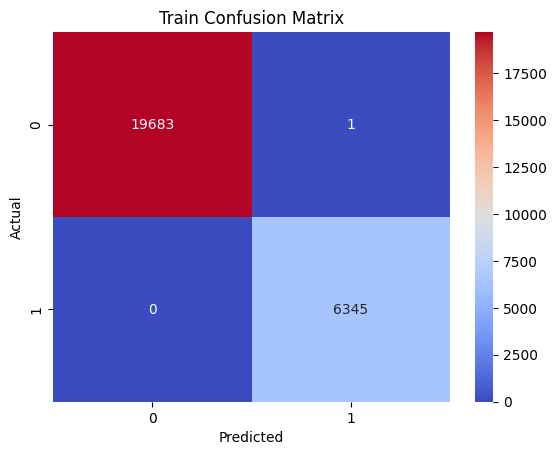


Test f1 score: 0.5411157691067398


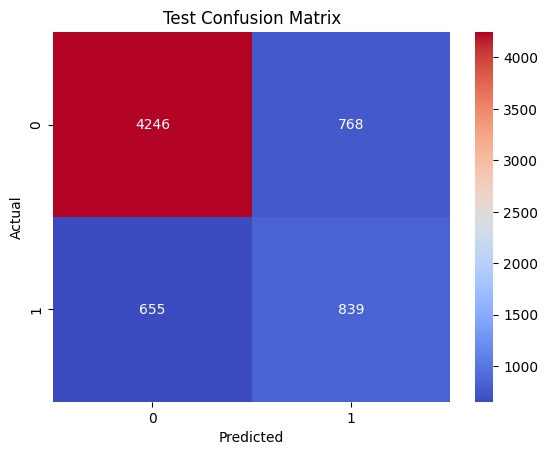

In [ ]:
score_model(tree_initial, x_train, x_test, y_train, y_test)

In [ ]:
#Now let's try tuning the model using randomized search CV.

tree_tuned = DecisionTreeClassifier(random_state=r_state)

param_grid = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'max_depth': np.arange(1,16),
              'class_weight': [{0:0.25, 1:0.75}, 'balanced'],
              'min_impurity_decrease': [0.0001, 0.001, 0.01],
              'ccp_alpha': [0,0.5,1],
              'min_samples_leaf':[1,2,3,4,5]}

r_search = RandomizedSearchCV(estimator = tree_tuned, param_distributions=param_grid,
                              n_iter = 500, scoring='f1', n_jobs=-1, cv=5, verbose=1,
                              random_state=r_state)

r_search.fit(x_train, y_train)

tree_tuned = r_search.best_estimator_

print(f"The best parameters are: {r_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best parameters are: {'splitter': 'best', 'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_depth': 9, 'criterion': 'gini', 'class_weight': {0: 0.25, 1: 0.75}, 'ccp_alpha': 0}


Train f1 score: 0.6508903744897355


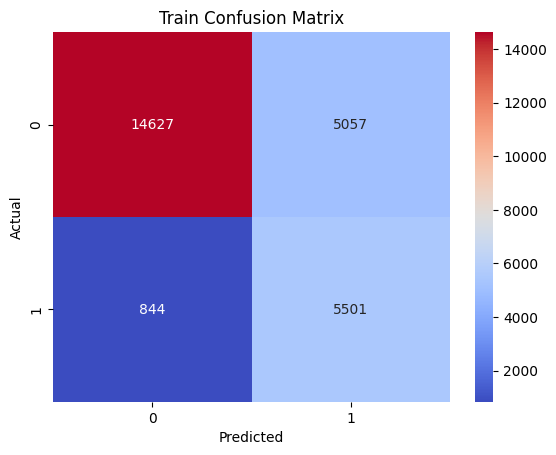


Test f1 score: 0.622146673142302


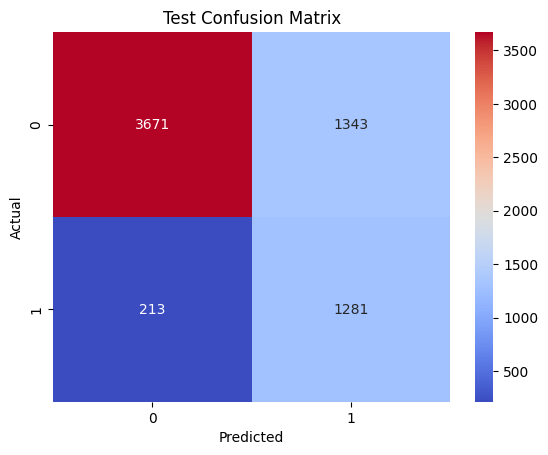

In [103]:
score_model(tree_tuned, x_train, x_test, y_train, y_test)

Cannot get past the .65-.62 score so that will be the final for this. Next we will try post-pruning using cost complexity to improve the f1 score.

In [ ]:
#Exporting model to avoid the need to re-train.
tuned_filename = "Best Tuned Model"
with open(tuned_filename, "wb") as model_file:
  pickle.dump(tree_tuned, model_file)

In [ ]:
#Importing the model after leaving the notebook.
tuned_filename = "Best Tuned Model"
with open(tuned_filename, "rb") as model_file:
  tree_tuned = pickle.load(model_file)

In [94]:
#NOW TRYING POST-PRUNING TO IMPROVE CLASSIFIER PERFORMANCE.
tree_pruned = DecisionTreeClassifier(class_weight={0:0.25, 1:0.75},
                                     random_state=r_state)

In [95]:
#Visualizing the impurity loss graph function.
def visualize_imp_loss(tree_model):
  '''Visualized the impurity loss as the cost complexity parameter (ccp_alpha)
  is increased pruning more aggresively.'''

  cost_path = tree_model.cost_complexity_pruning_path(x_train, y_train)
  ccp_alphas, impurities = cost_path.ccp_alphas, cost_path.impurities

  fig, ax = plt.subplots(figsize=(10,7))
  ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
  plt.title("Impurities vs Cost Complexity Parameter")
  plt.xlabel("Cost Complexity Parameter")
  plt.ylabel("Impurities")
  plt.show()

In [96]:
def visualize_f1_alpha(tree_model,x_train,x_test,y_train,y_test):
  '''visualizes the loss in recall as the cost complexity parameter
  is increased.'''

  #Alphas and impurities.
  cost_path = tree_model.cost_complexity_pruning_path(x_train,y_train)
  ccp_alphas, impurities = cost_path.ccp_alphas, cost_path.impurities

  #Classifiers
  clfs = []
  for ccp_alpha in ccp_alphas:
      clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
      clf.fit(x_train, y_train)
      clfs.append(clf)

  #Ommit the last classifier that is a fully grown tree. Extreme case.
  clfs = clfs[:-1]
  ccp_alphas = ccp_alphas[:-1]
  impurities = impurities[:-1]

  #train and test f1 scores.
  f1_train_scores = []
  for clf in clfs:
    pred_train = clf.predict(x_train)
    f1_train = f1_score(y_train, pred_train)
    f1_train_scores.append(f1_train)

  f1_test_scores = []
  for clf in clfs:
    pred_test = clf.predict(x_test)
    f1_test = f1_score(y_test, pred_test)
    f1_test_scores.append(f1_test)

  #Plottng comparison graph.
  fig, ax = plt.subplots(figsize=(10,7))
  ax.plot(ccp_alphas, f1_train_scores, marker ="o", drawstyle = "steps-post", label="Train")
  ax.plot(ccp_alphas, f1_test_scores, marker="o", drawstyle = "steps-post", label="Test")
  plt.title("Train and Test F1 Scores vs Cost Complexity Parameter")
  plt.xlabel("Cost Complexity Parameter")
  plt.ylabel("F1 Score")
  ax.legend()
  plt.show()

  #Returning the best model parameters.
  best_model_index = np.argmax(f1_test_scores)
  best_model = clfs[best_model_index]
  print(best_model)

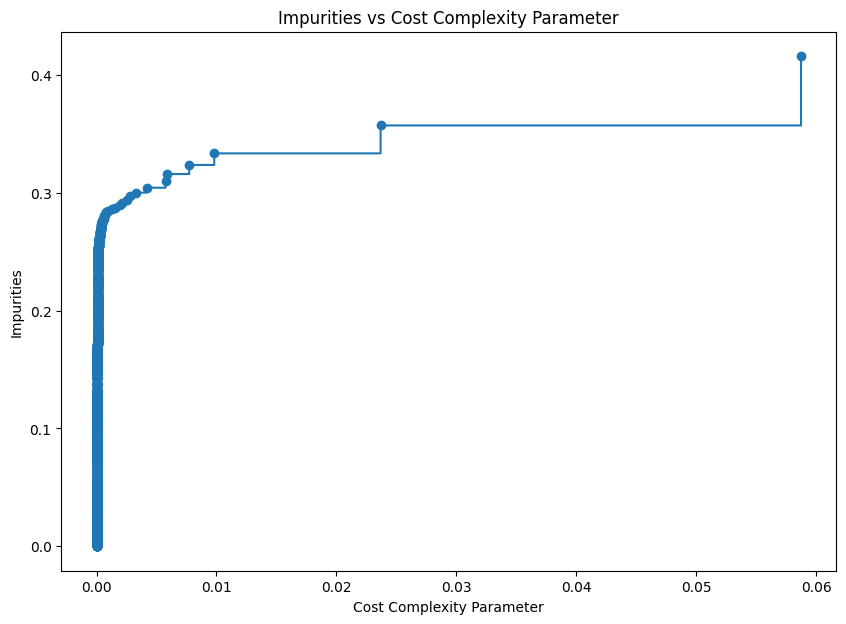

In [97]:
visualize_imp_loss(tree_pruned)

Observed a large loss in purity up to ccp_alpha of ~0.005 and then the purity levels out.

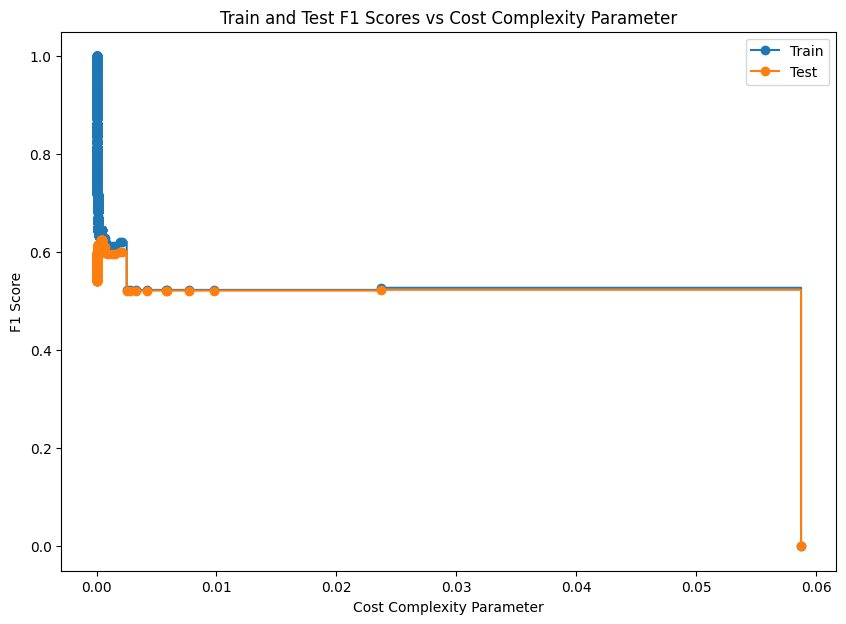

DecisionTreeClassifier(ccp_alpha=0.00040407511679078087, random_state=1)


In [98]:
visualize_f1_alpha(tree_pruned, x_train, x_test, y_train, y_test)

Train f1 score: 0.6663323512818906


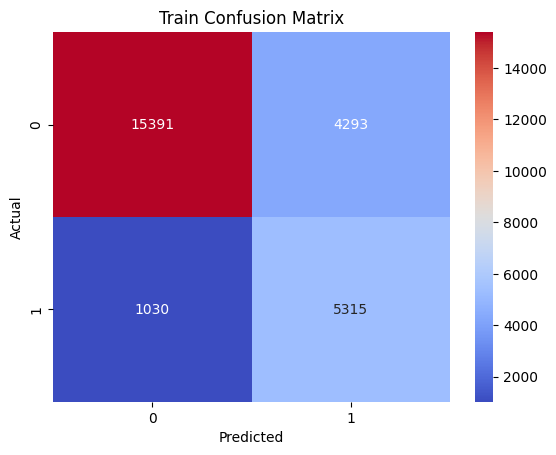


Test f1 score: 0.6365280289330922


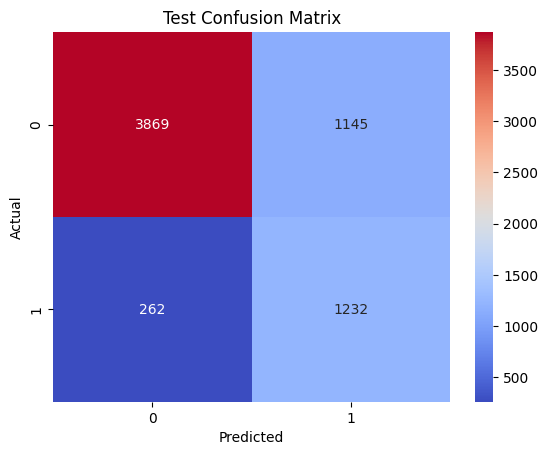

In [104]:
#Testing the best tree.
best_pruned_tree = DecisionTreeClassifier(class_weight={0:0.25, 1:0.75},
                                          random_state=r_state,
                                          ccp_alpha=0.00041722099414613287)

best_pruned_tree.fit(x_train, y_train)
score_model(best_pruned_tree, x_train, x_test, y_train, y_test)

Best resul so far.

In [105]:
print("*"*100)

****************************************************************************************************


RESULTS

In [108]:
#Dataframe to compare classifier results.

clf_data = [
    ("Standard Tree", 0.9999, 0.5411),
    ("Tuned Tree", 0.6509, 0.6221),
    ("Pruned Tree", 0.6663, 0.6365)
]

columns = ["Model Name", "Train F1 Score", "Test F1 Score"]

clf_df = pd.DataFrame(clf_data, columns=columns)

clf_df

,Model Name,Train F1 Score,Test F1 Score
0,Standard Tree,0.9999,0.5411
1,Tuned Tree,0.6509,0.6221
2,Pruned Tree,0.6663,0.6365


The final result doesn't have a high enough score to put into production for most cases. I would look into preprocessing data differently (oversampling/undersampling, combining categorical classes more aggressively). Additionaly, there is more tuning that can be done with both pre-tuning and post-pruning.